<div style="text-align: center;">   <img alt="foto" height="160" src="https://i.postimg.cc/7H7zcX2c/CIMA-LOGO.png?dl=1" width="160"/>
</div>


<div style="text-align: center;">

## Imputación de Valores Faltantes con RandomForest
### 1. **Contexto**
### 2. **Explicación del Algoritmo MissForest**
### 3. **Ejemplo Práctico**
### 4. **Comparación con KNN**
### 5. **Conclusiones**


</div>


<div style="text-align: center;">

----------------------------------------------------------------
###### GitHub: [JAIROX2004](https://github.com/JAIROX2004)  
###### Linkedin: [Jairo Gonzalo Rojas Melgarejo ](https://www.linkedin.com/in/jairo-gonzalo-rojas-melgarejo-248166239/)
###### **Jairo Gonzalo Rojas Melgaraejo**  
###### **Estudiante de Estadística e Informática de la UNALM** 
----------------------------------------------------------------
</div>

### 1. Contexto

La imputación de valores faltantes es un paso crucial en el preprocesamiento de datos. Los valores faltantes pueden surgir por diversas razones, como errores de recolección de datos o problemas en el registro. Estos valores faltantes pueden afectar la calidad del análisis y el rendimiento de los modelos predictivos. Por lo tanto, es importante manejar estos valores de manera adecuada.

En este trabajo, exploraremos cómo imputar valores faltantes utilizando el algoritmo MissForest. Este algoritmo, basado en Random Forest, ofrece una metodología robusta para tratar los valores faltantes, especialmente en conjuntos de datos con características mixtas (numéricas y categóricas). Además, compararemos MissForest con el algoritmo KNN (K-Nearest Neighbors) para evaluar cuál es más eficaz en diferentes escenarios.

La decisión de imputar valores faltantes depende del porcentaje de datos faltantes en una columna:

- **Menos del 5%**: Imputar es generalmente seguro.
- **5% - 30%**: Imputar es una opción viable, especialmente si la columna es importante.
- **30% - 50%**: Evaluar cuidadosamente si imputar o eliminar; depende del contexto.
- **Más del 50%**: Generalmente, es mejor eliminar la columna.

Fuentes:     
[Data Column Blog - What's Missing? Solving the Missing Values Dilemma](https://datacolumn.iaa.ncsu.edu/blog/2016/02/29/whats-missing-solving-the-missing-values-dilemma/)  
         [Missing Data | Types, Explanation, & Imputation](https://www.scribbr.com/statistics/missing-data/)
         


### 2. Explicación del Algoritmo MissForest


<div style="text-align: center;">

  ![image.png](rf.jpg)
  
  <sub>Fuente: <a href="https://blogdatlas.wordpress.com/tag/missforest/">Métodos avanzados para lidiar con datos nulos – Columna de Investigación DATLAS</a></sub>
</div>


El diagrama ilustra un enfoque para imputar valores faltantes en un conjunto de datos utilizando un modelo de **Random Forest**. A continuación se describen los pasos principales:

#### **Paso 1: Inicialización**
En este paso, se realiza una estimación inicial de los valores faltantes. Los métodos comunes incluyen:
- **Media**: Rellenar los valores faltantes con la media de la característica.
- **Mediana**: Usar la mediana de la característica.
- **Moda**: Aplicar la moda (el valor más frecuente).

En la imagen:
- Los valores faltantes están representados en **rojo**.
- Los valores presentes de otras características están en **verde**.
- Los valores presentes en la misma característica están en **azul**.

#### **Paso 2: Entrenamiento del Modelo Random Forest**
Usando los valores imputados del **Paso 1**, se entrena un modelo de **Random Forest** donde la característica con valores faltantes se convierte en la variable dependiente (variable objetivo). Este modelo aprende a predecir la característica faltante basándose en las otras características del conjunto de datos.

#### **Paso 3: Predicción de los Valores Faltantes**
El modelo de **Random Forest** predice los valores de la característica que inicialmente tenía datos faltantes. Estas predicciones reemplazan los valores faltantes en el conjunto de datos.

#### **Paso 4: Iteración**
Este proceso se repite:
1. Usando el conjunto de datos con los valores imputados recientemente, se vuelve a entrenar el modelo.
2. Se predicen nuevamente los valores faltantes.
3. Este ciclo continúa hasta que se alcanza un número máximo de iteraciones o el modelo converge (es decir, las predicciones dejan de cambiar significativamente entre iteraciones).

El ciclo de repetición asegura que la imputación de los valores faltantes sea lo más precisa posible, reduciendo el sesgo introducido por la estimación inicial.

---

#### **Resumen**
El proceso combina un enfoque inicial de estimación simple con la robustez de un **Random Forest** para refinar los valores imputados. Este enfoque iterativo mejora la precisión de la imputación, especialmente en conjuntos de datos con relaciones no lineales complejas entre las características.


### 3. Ejemplo Practico


#### 3.1. Paquetes

In [41]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder


#### 3.2. Lectura de Datos


#### Descripción General del Conjunto de Datos

Este conjunto de datos contiene información sobre reservas de hotel, incluyendo diversas características que describen tanto la reserva en sí como el comportamiento del cliente. Algunas de las columnas más relevantes incluyen:

- **`hotel`**: Tipo de hotel en el que se realizó la reserva (City Hotel o Resort Hotel).
- **`is_canceled`**: Indica si la reserva fue cancelada o no.
- **`lead_time`**: Tiempo (en días) entre la fecha de reserva y la fecha de llegada.
- **`arrival_date_year`**, **`arrival_date_month`**, **`arrival_date_week_number`**, **`arrival_date_day_of_month`**: Información sobre la fecha de llegada del cliente.
- **`stays_in_weekend_nights`**, **`stays_in_week_nights`**: Número de noches de estancia durante el fin de semana y días de semana, respectivamente.
- **`adults`**, **`children`**, **`babies`**: Cantidad de adultos, niños y bebés en la reserva.
- **`meal`**: Tipo de comida reservada.
- **`country`**: País de origen del cliente.
- **`market_segment`**, **`distribution_channel`**: Información sobre el segmento de mercado y el canal de distribución de la reserva.
- **`agent`**: Identificador del agente que realizó la reserva. Aunque esta columna tiene un **13.69%** de datos faltantes, no se imputarán estos valores, ya que la columna es de identificación y no influye en el análisis analítico principal.
- **`company`**: Identificador de la compañía asociada a la reserva, si aplica. Sin embargo, esta columna tiene un **94.31%** de datos faltantes, lo que sugiere que la información no es relevante para la mayoría de las reservas. Por ello, se ha decidido **eliminar esta columna** del análisis para evitar que la alta cantidad de datos faltantes afecte los resultados.

Otras columnas incluyen información sobre la habitación reservada, si hubo cambios en la reserva, tipo de depósito, solicitudes especiales, entre otros detalles.

Este conjunto de datos es clave para entender los patrones de reservas y cancelaciones, así como para desarrollar modelos predictivos que ayuden a mejorar la gestión hotelera.


In [42]:
datos=pd.read_csv("archivo_NA.csv")
df=pd.DataFrame(datos)

#### 3.3 Analísis Exploratorio

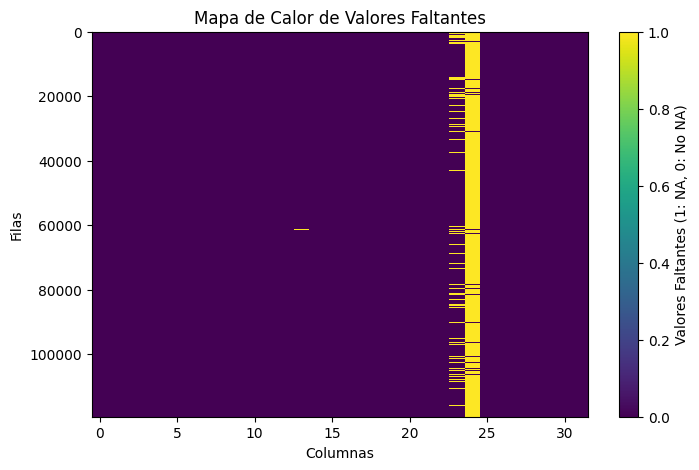

In [43]:
# Visualizar valores faltantes usando un mapa de calor
plt.figure(figsize=(8, 5))
plt.imshow(df.isnull(), aspect='auto', cmap='viridis', interpolation='none')
plt.colorbar(label='Valores Faltantes (1: NA, 0: No NA)')
plt.xlabel('Columnas')
plt.ylabel('Filas')
plt.title('Mapa de Calor de Valores Faltantes')
plt.show()

In [44]:

# Supongamos que 'df' es tu DataFrame
# Calcular proporción de datos faltantes por cada columna
missing_proportion = (df.isnull().sum() / len(df)) * 100
# Sugerir acciones basadas en la proporción de datos faltantes
threshold_high = 50  # Umbral alto para eliminar (en porcentaje)
threshold_low = 5    # Umbral bajo para imputar (en porcentaje)

for column, proportion in missing_proportion.items():
    if proportion > threshold_high:
        print(f"La columna '{column}' tiene {proportion:.2f}% de datos faltantes. Considera eliminarla.")
    elif proportion > threshold_low:
        print(f"La columna '{column}' tiene {proportion:.2f}% de datos faltantes. Considera imputar los valores faltantes.")
    else:
        print(f"La columna '{column}' tiene {proportion:.2f}% de datos faltantes. El impacto es mínimo.")


La columna 'hotel' tiene 0.00% de datos faltantes. El impacto es mínimo.
La columna 'is_canceled' tiene 0.00% de datos faltantes. El impacto es mínimo.
La columna 'lead_time' tiene 0.00% de datos faltantes. El impacto es mínimo.
La columna 'arrival_date_year' tiene 0.00% de datos faltantes. El impacto es mínimo.
La columna 'arrival_date_month' tiene 0.00% de datos faltantes. El impacto es mínimo.
La columna 'arrival_date_week_number' tiene 0.00% de datos faltantes. El impacto es mínimo.
La columna 'arrival_date_day_of_month' tiene 0.00% de datos faltantes. El impacto es mínimo.
La columna 'stays_in_weekend_nights' tiene 0.00% de datos faltantes. El impacto es mínimo.
La columna 'stays_in_week_nights' tiene 0.00% de datos faltantes. El impacto es mínimo.
La columna 'adults' tiene 0.00% de datos faltantes. El impacto es mínimo.
La columna 'children' tiene 0.00% de datos faltantes. El impacto es mínimo.
La columna 'babies' tiene 0.00% de datos faltantes. El impacto es mínimo.
La columna '

### Notas:
- **Columna `agent`**: Tiene un 13.69% de datos faltantes. Se recomienda imputar estos valores.
- **Columna `company`**: Presenta un 94.31% de datos faltantes. Dado el alto porcentaje de datos faltantes, se sugiere considerar la eliminación de esta columna del análisis.

In [45]:
# Supongamos que ya tienes el DataFrame 'df'
# Eliminar columnas de identificación Con Valores perdidos
df_cleaned = df.drop(columns=['agent', 'company'])

# Verificar las primeras filas del DataFrame limpio
df_cleaned

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,C,3,No Deposit,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,C,4,No Deposit,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,C,0,No Deposit,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,A,0,No Deposit,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,A,0,No Deposit,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,A,0,No Deposit,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,E,0,No Deposit,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,D,0,No Deposit,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,A,0,No Deposit,0,Transient,104.40,0,0,Check-Out,2017-09-07


#### 3.4. Código para Generar Valores Perdidos en la Columna `lead_time`

Este código introduce valores faltantes aleatoriamente en la columna `lead_time` de tu DataFrame `df`, aproximadamente un 15% de los datos. Esto te permitirá comparar los resultados imputados con los datos originales para evaluar la efectividad de las técnicas de imputación.


In [46]:
# Establecer una semilla para reproducibilidad
np.random.seed(42)

# Número total de filas en el DataFrame
total_filas = df_cleaned.shape[0]

# Generar índices aleatorios que representarán aproximadamente el 15% de los datos en 'lead_time'
indices_a_nulos = np.random.choice(total_filas, size=int(0.15 * total_filas), replace=False)

# Crear valores perdidos en 'lead_time'
df_with_missing = df_cleaned.copy()
df_with_missing.loc[indices_a_nulos, 'lead_time'] = np.nan

# Verificar la cantidad de valores faltantes en 'lead_time' después de introducir los valores perdidos
print(f"Valores perdidos en 'lead_time' después de introducir los valores faltantes: {df_with_missing['lead_time'].isnull().sum()}")
print(f"Proporción de valores perdidos en 'lead_time': {(df_with_missing['lead_time'].isnull().sum() / len(df_cleaned)) * 100:.6f}%")


Valores perdidos en 'lead_time' después de introducir los valores faltantes: 17908
Proporción de valores perdidos en 'lead_time': 14.999581%


#### 3.5. Imputar los Valores Perdidos en la Columna `lead_time` con MissForest


In [47]:
# Supongamos que ya tienes el DataFrame 'df_with_missing'
# Convertir columnas categóricas a numéricas usando LabelEncoder
label_encoders = {}
for column in df_with_missing.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df_with_missing[column] = le.fit_transform(df_with_missing[column].astype(str))
    label_encoders[column] = le

# Crear una copia del DataFrame con los valores perdidos para imputar
df_imputation = df_with_missing.copy()

In [48]:
# Separar la columna con valores perdidos y el resto del DataFrame
target_column = 'lead_time'
X = df_imputation.drop(columns=[target_column])
y = df_imputation[target_column]

# Separar los datos en los que 'lead_time' está presente y los que están faltantes
X_train = X[y.notnull()]
y_train = y.dropna()
X_test = X[y.isnull()]

# Inicializar el imputador RandomForestRegressor
rf_imputer = RandomForestRegressor()

# Ajustar el imputador con los datos donde 'lead_time' está presente
rf_imputer.fit(X_train, y_train)

# Predecir los valores faltantes
y_imputed = rf_imputer.predict(X_test)

# Reemplazar los valores faltantes en el DataFrame original
df_imputation.loc[y.isnull(), target_column] = y_imputed

# Verificar los resultados de la imputación en la columna 'lead_time'
print(f"Valores perdidos en 'lead_time' después de la imputación: {df_imputation['lead_time'].isnull().sum()}")


Valores perdidos en 'lead_time' después de la imputación: 0


#### 3.6. Evaluando la Imputación de  los Valores Perdidos en la Columna `lead_time` con MissForest


In [51]:
# Calcular el MSE entre los valores originales y los imputados
mse = mean_squared_error(df["lead_time"], df_imputation["lead_time"])
print(f"Mean Squared Error (MSE): {mse:.6f}")


Mean Squared Error (MSE): 215.105021


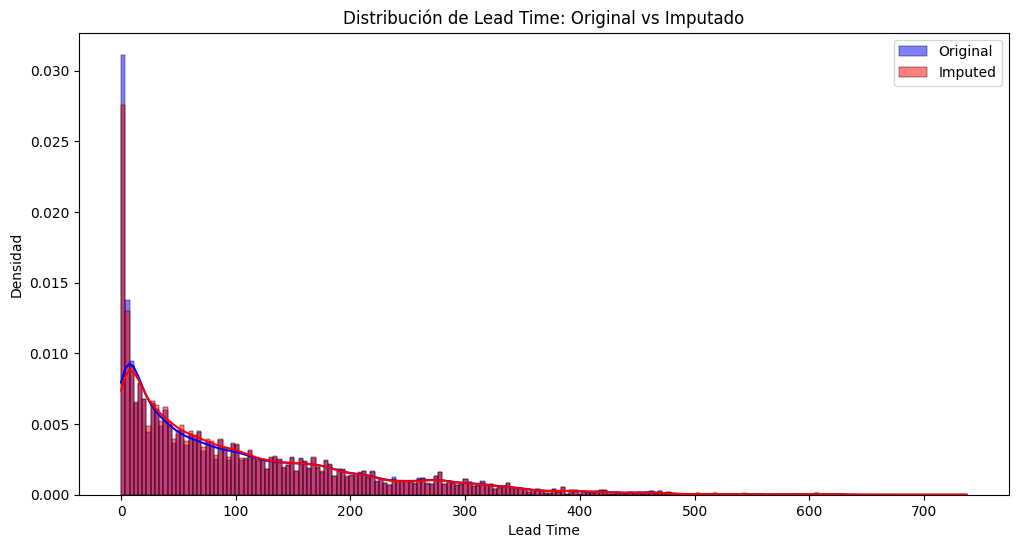

In [73]:
# Crear una figura y ejes para el gráfico
plt.figure(figsize=(12, 6))

# Graficar la distribución de los valores originales
sns.histplot(df["lead_time"], kde=True, color='blue', label='Original', stat='density', bins=200)

# Graficar la distribución de los valores imputados
sns.histplot(df_imputation["lead_time"], kde=True, color='red', label='Imputed', stat='density', bins=200)

# Configurar el gráfico
plt.title('Distribución de Lead Time: Original vs Imputado')
plt.xlabel('Lead Time')
plt.ylabel('Densidad')
plt.legend()
plt.show()


### 4. Comparación con KNN

#### 4.1. Imputar los Valores Perdidos en la Columna `lead_time` con MissForest


In [ ]:
# Inicializar el imputador KNNImputer
knn_imputer = KNNImputer(n_neighbors=5)  # Puedes ajustar el número de vecinos si es necesario

# Ajustar el imputador a los datos y transformar
df_imputed_knn = knn_imputer.fit_transform(df_imputation)

# Convertir el resultado imputado de nuevo a un DataFrame
df_imputed_knn = pd.DataFrame(df_imputed_knn, columns=df_imputation.columns)

# Verificar los resultados de la imputación en la columna 'lead_time'
print(f"Valores perdidos en 'lead_time' después de la imputación: {df_imputed_knn['lead_time'].isnull().sum()}")


Valores perdidos en 'lead_time' después de la imputación: 0


#### 4.2. Evaluando la Imputación de  los Valores Perdidos en la Columna `lead_time` con KNN

In [77]:

# Calcular el MSE entre los valores originales y los imputados
mse = mean_squared_error(df["lead_time"], df_imputed_knn["lead_time"])
print(f"Mean Squared Error (MSE): {mse:.6f}")


Mean Squared Error (MSE): 476.033856


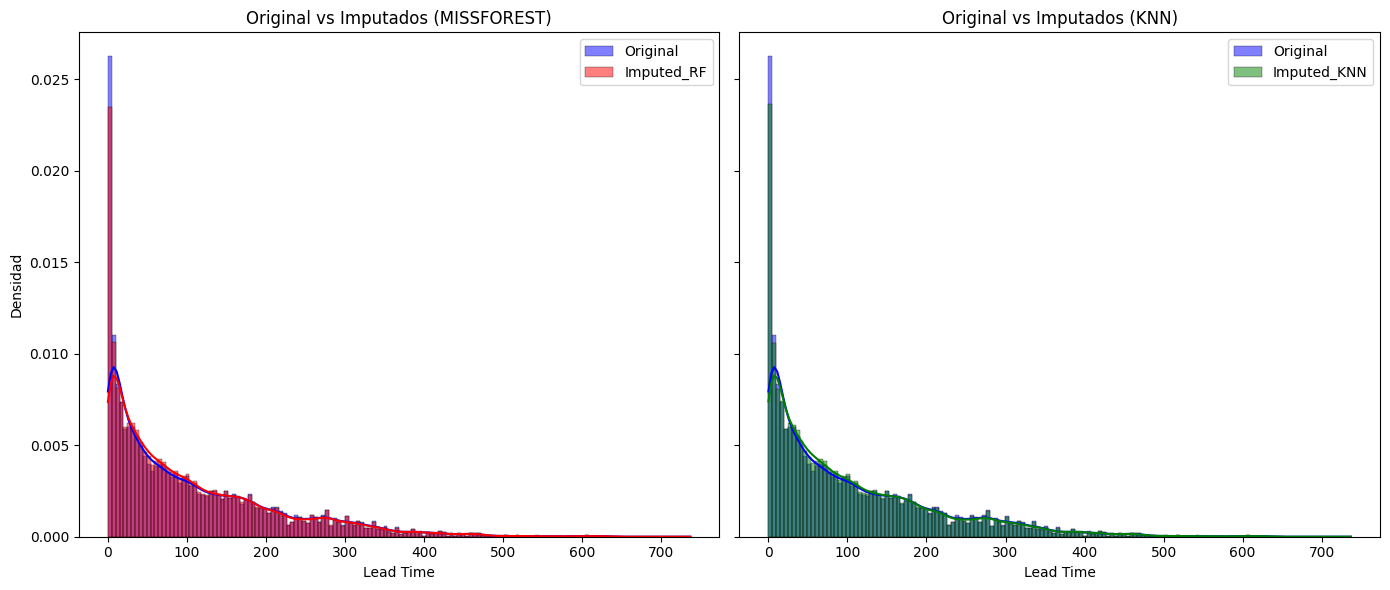

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear una figura y ejes para los gráficos
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Graficar la distribución de los valores originales vs imputados por MISSFOREST en el primer gráfico
sns.histplot(df["lead_time"], kde=True, color='blue', label='Original', stat='density', bins=150, ax=axes[0])
sns.histplot(df_imputation["lead_time"], kde=True, color='red', label='Imputed_RF', stat='density', bins=150, ax=axes[0])
axes[0].set_title('Original vs Imputados (MISSFOREST)')
axes[0].set_xlabel('Lead Time')
axes[0].set_ylabel('Densidad')
axes[0].legend()

# Graficar la distribución de los valores originales vs imputados por KNN en el segundo gráfico
sns.histplot(df["lead_time"], kde=True, color='blue', label='Original', stat='density', bins=150, ax=axes[1])
sns.histplot(df_imputed_knn["lead_time"], kde=True, color='green', label='Imputed_KNN', stat='density', bins=150, ax=axes[1])
axes[1].set_title('Original vs Imputados (KNN)')
axes[1].set_xlabel('Lead Time')
axes[1].set_ylabel('Densidad')
axes[1].legend()

# Mostrar los gráficos
plt.tight_layout()
plt.show()


### 5. Conclusiones

**Conservación de la Distribución Original**: Tanto MissForest como KNN han logrado mantener la forma de la distribución original de la variable `lead_time`, como se observa en los gráficos de densidad. Las densidades de los datos originales y los imputados se superponen, lo que sugiere una buena preservación de la distribución.

**Rendimiento de MissForest vs. KNN**: MissForest tiene un error cuadrático medio (MSE: 215.105021) significativamente menor que KNN (MSE: 476.033856), lo que indica que MissForest proporciona imputaciones más precisas y cercanas a los valores reales.

**Precisión en Imputaciones**: La diferencia menor entre las curvas de densidad de los datos originales e imputados con MissForest, comparada con KNN, sugiere que MissForest captura mejor la variabilidad y las relaciones en los datos, ofreciendo imputaciones más representativas de los valores originales.

**Imputación de Valores Perdidos**: La imputación es crucial cuando se generan valores faltantes aleatoriamente. MissForest, con su enfoque de bosques aleatorios, demuestra ser robusto en situaciones con estructuras de datos complejas, mientras que KNN puede ser menos preciso en tales escenarios.
